In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline


In [10]:
# 깃허브 클론
!git clone https://github.com/emredjan/ISL-python

fatal: destination path 'ISL-python' already exists and is not an empty directory.


In [11]:
# 데이터셋 불러오기
adv = pd.read_csv('ISL-python/datasets/Advertising.csv', 
                  usecols=[1,2,3,4])
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# 1.단순 선형 회귀 (Simple Linear Regression)

/Users/jisukim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


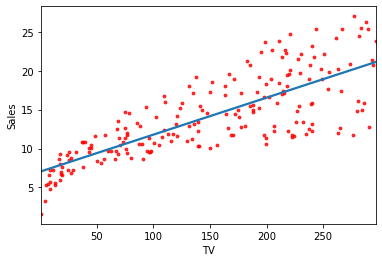

In [19]:
#adv 데이터셋에서 Tv와 Sales 간의 관계를 살펴보고, 회귀직선을 그려보자.
sns.regplot(adv.TV, adv.Sales, order=1, ci=None, 
            scatter_kws={'color':'r', 's':8})

reg = skl_lm.LinearRegression()

In [24]:
# 1-2. 회귀식의 정확도 평가 

pred_sale = reg.predict(X) 
r2 = r2_score(y ,pred_sale)
print('R2 score : ', r2)

R2 score :  0.611875050850071


In [62]:
# TV에서 광고하는 횟수가 많아질수록 판매량도 늘어나는 추세가 보인다. 
# 그러나, 광고 횟수가 많아짐과 동시에 편향(bias)도 커지고, 분산(variance)도 커진다.

# Sales에 대한 TV의 선형 회귀계수 추정

X= scale(adv.TV, with_mean=True, with_std=False).reshape(-1,1)
y=adv.Sales

reg.fit(X,y)
print('단순 선형 회귀식 : ', reg.intercept_, '+', 
     reg.coef_.astype('float') , 'x' )



단순 선형 회귀식 :  14.0225 + [0.04753664] x


# 2. 다중 선형 회귀 (Multiple Linear Regression)

In [26]:
# 위 데이터셋의 Tv, Radio, Newspaper 변수를 모두 사용.

# OLS result 확인
test = smf.ols('Sales ~ TV + Radio + Newspaper', adv).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        16:11:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

X2 = adv[['Radio','TV','Newspaper']]
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['features'] = X2.columns
vif

,VIF Factor,features
0,3.285462,Radio
1,2.486772,TV
2,3.055245,Newspaper


In [61]:
# vif 가 10 이상이면 다중공선성이 있다고 한다. 
# vif가 모두 10 미만이므로 다중공선성이 존재한다고 할 수는 없다.

# 다중 선형 회귀식 출력
regg= skl_lm.LinearRegression()

y1=adv.Sales

reg.fit(X2,y1)

coef_Radio = round(reg.coef_[0],3) #소수점 세번째까지 표현
coef_TV = round(reg.coef_[1],3)
coef_News = round(reg.coef_[2],3) 
intercept = round(reg.intercept_,3)

print ('다중 선형 회귀식 : ' , intercept, '+', 
       coef_Radio, 'x1','+', coef_TV, 'x2', coef_News,'x3')
print('x1 = Radio, x2 = TV, x3 = Newspaper')

다중 선형 회귀식 :  2.939 + 0.189 x1 + 0.046 x2 -0.001 x3
x1 = Radio, x2 = TV, x3 = Newspaper


# 3. 로지스틱 회귀 (Logistic Regression)

In [ ]:
# 놀이공원에서 어떤 채널- post / offline /email
# 을 통해 티켓이 판매되었는지 - pass / no pass
# 판매되었을 때 추가적인 번들 옵션이 제공되었는지의 여부 - bundle / nobundle 

# 번들 옵션을 제공했을 때 티켓 판매에 영향을 주는지를 로지스틱 회귀를 이용해 알아본다.

In [72]:
# 데이터 불러오기

data = pd.read_excel('/Users/jisukim/Documents/logistic.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156 entries, 0 to 3155
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Channel  3156 non-null   object
 1   Offer    3156 non-null   object
 2   Ticket   3156 non-null   object
dtypes: object(3)
memory usage: 74.1+ KB


In [74]:
data.head()

,Channel,Offer,Ticket
0,Post,Bundle,Pass
1,Offline,Bundle,Pass
2,Post,NoBundle,Pass
3,Offline,Bundle,NoPass
4,Offline,Bundle,Pass


In [75]:
# offer, ticket 변수의 데이터 값을 0,1 숫자로 인코딩
data.Ticket = data.Ticket.astype('str').map({'Pass':1, 'NoPass':0})
data.Offer = data.Offer.astype('str').map({'Bundle':1, 'NoBundle':0})

data.head()

,Channel,Offer,Ticket
0,Post,1,1
1,Offline,1,1
2,Post,0,1
3,Offline,1,0
4,Offline,1,1


In [76]:
# 로지스틱 회귀
x = data.Offer
y = data.Ticket
model = sm.formula.glm('y ~ x', data, 
                       family = sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3156
Model:                            GLM   Df Residuals:                     3154
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2172.7
Date:                Wed, 28 Jul 2021   Deviance:                       4345.4
Time:                        16:58:27   Pearson chi2:                 3.16e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1922      0.052     -3.683      0.0

In [80]:
# p값을 확인해 보면, 유의수준 0.05 하에서 귀무가설을 기각한다. 즉, 통계적으로 유의미한 결과.
# 회귀계수를 확인해보면,
model.params

Intercept   -0.192223
x            0.388791
dtype: float64

In [ ]:
# 번들이 제공되었을 때(1), 판매 여부에 양(+) 의 영향을 주는 것을 알 수 있다.